<a href="https://colab.research.google.com/github/Amishachoudhary22/AI-ML/blob/main/facialrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os



In [ ]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
filname = '../input/facial-expression/fer2013/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [ ]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [ ]:
filename = 'fer2013.csv'

In [ ]:
def getData(filename):
    import csv
    import numpy as np

    X = []
    Y = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        first = True
        for row in reader:
            if first:  # Skip header
                first = False
                continue

            label = int(row[0])
            pixels = row[1].split()  # Split the pixel string into individual elements

            if len(pixels) != 48 * 48:
                print(f"Inconsistent data at row {reader.line_num}: Expected 2304, got {len(pixels)}")

            X.append([int(p) for p in pixels])
            Y.append(label)

    return X, Y


In [ ]:
def getData(filename):
    import csv
    import numpy as np

    X = []
    Y = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        first = True
        for row in reader:
            if first:
                first = False
                continue

            label = int(row[0])
            pixels = row[1].split()

            # Ensure consistent pixel count (48 * 48 = 2304)
            if len(pixels) != 2304:
                continue  # Skip rows with inconsistent pixel data

            X.append([int(p) for p in pixels])
            Y.append(label)

    # Convert to numpy arrays and normalize
    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y


In [ ]:
X, Y = getData(filename)
num_class = len(set(Y))
print(num_class)

7


In [ ]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [ ]:
# Correct import for Keras layers in TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.metrics import CategoricalAccuracy


In [ ]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Correct imports from TensorFlow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.metrics import CategoricalAccuracy


TensorFlow version: 2.15.0


In [ ]:
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization

In [ ]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()

    return model
model=my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       4

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

# Define the model creation function
def my_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(7, activation='softmax')  # Assuming 7 output classes
    ])
    return model

# Create the model
model = my_model()

# Compile the model with an optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set the learning rate
K.set_value(model.optimizer.learning_rate, 1e-3)  # This should now work


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define the model
def my_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')  # Assuming 7 output classes
    ])
    return model

# Set the path for saving the model
path_model = 'model_filter.h5'  # File path for saving the model

# Clear the session to avoid any issues with previous models/graphs
K.clear_session()

# Create a new model instance
model = my_model()

# Compile the model with an optimizer
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with checkpoints
h = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test),
    shuffle=True,
    callbacks=[ModelCheckpoint(filepath=path_model)]
)


Epoch 1/20
32/32 [==============================] - ETA: 0s - loss: 3.0738 - accuracy: 0.1588

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 11s 307ms/step - loss: 3.0738 - accuracy: 0.1588 - val_loss: 1.8184 - val_accuracy: 0.2400
Epoch 2/20
32/32 [==============================] - 7s 218ms/step - loss: 1.8761 - accuracy: 0.2156 - val_loss: 1.8162 - val_accuracy: 0.2311
Epoch 3/20
32/32 [==============================] - 7s 216ms/step - loss: 1.8464 - accuracy: 0.2206 - val_loss: 1.7896 - val_accuracy: 0.2444
Epoch 4/20
32/32 [==============================] - 8s 240ms/step - loss: 1.8230 - accuracy: 0.2280 - val_loss: 1.7773 - val_accuracy: 0.2533
Epoch 5/20
32/32 [==============================] - 6s 199ms/step - loss: 1.8162 - accuracy: 0.2399 - val_loss: 1.7552 - val_accuracy: 0.2622
Epoch 6/20
32/32 [==============================] - 8s 239ms/step - loss: 1.7942 - accuracy: 0.2493 - val_loss: 1.7995 - val_accuracy: 0.2711
Epoch 7/20
32/32 [==============================] - 6s 192ms/step - loss: 1.7919 - accuracy: 0.2522 - val_loss: 1.7546 - val_accuracy: 0.2533
Epoch 8/20
32/32

In [ ]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [ ]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

plt.show()

In [ ]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

8/8 [==============================] - 1s 60ms/step


(225, 7)

1/1 [==============================] - 0s 159ms/step


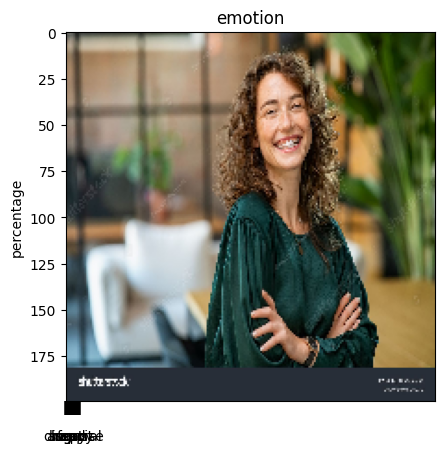

Expression Prediction: happy


In [ ]:
from skimage import io
img = image.load_img('smiling.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('smiling.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])

1/1 [==============================] - 0s 61ms/step


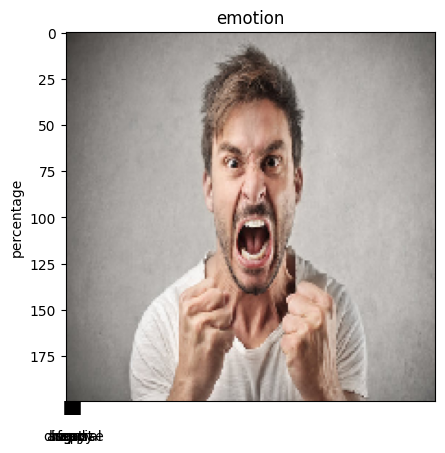

Expression Prediction: angry


In [ ]:
from skimage import io
img = image.load_img('angry.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('angry.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

num_classes = 7

y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Example feature data and labels
X = np.random.rand(450, 48, 48, 1)  # 450 samples of 48x48 grayscale images
Y = np.random.randint(0, 7, 450)  # 450 labels (integers from 0 to 6 for 7 classes)

# Ensure proper data splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(Y_train, num_classes=7)
y_test_onehot = to_categorical(Y_test, num_classes=7)

# Check the lengths after splitting
print("X_test length:", len(X_test))  # Should be 90 (20% of 450)
print("y_test_onehot length:", len(y_test_onehot))  # Should be 90

# The lengths should match before evaluation
assert len(X_test) == len(y_test_onehot), "X and Y sample counts do not match"


X_test length: 90
y_test_onehot length: 90


Epoch 1/20
6/6 [==============================] - 5s 524ms/step - loss: 4.4680 - accuracy: 0.1889 - val_loss: 2.3653 - val_accuracy: 0.1111
Epoch 2/20
6/6 [==============================] - 1s 222ms/step - loss: 2.1714 - accuracy: 0.1583 - val_loss: 1.9596 - val_accuracy: 0.1889
Epoch 3/20
6/6 [==============================] - 1s 220ms/step - loss: 1.9179 - accuracy: 0.1972 - val_loss: 1.9457 - val_accuracy: 0.1889
Epoch 4/20
6/6 [==============================] - 1s 208ms/step - loss: 1.9030 - accuracy: 0.1972 - val_loss: 1.9458 - val_accuracy: 0.1333
Epoch 5/20
6/6 [==============================] - 1s 211ms/step - loss: 1.8870 - accuracy: 0.2056 - val_loss: 1.9529 - val_accuracy: 0.1889
Epoch 6/20
6/6 [==============================] - 1s 222ms/step - loss: 1.8562 - accuracy: 0.2444 - val_loss: 1.9501 - val_accuracy: 0.1667
Epoch 7/20
6/6 [==============================] - 1s 214ms/step - loss: 1.8152 - accuracy: 0.2194 - val_loss: 1.9559 - val_accuracy: 0.1667
Epoch 8/20
6/6 [====

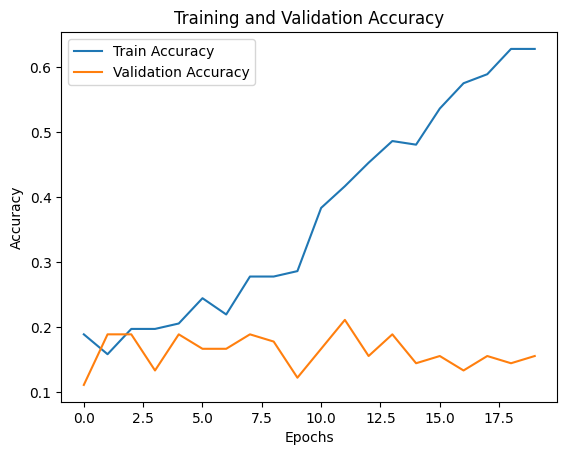

In [ ]:
# Compile the model with accuracy as a metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and track accuracy
history = model.fit(
    x=X_train,
    y=y_train_onehot,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test_onehot),
    verbose=1
)

# Plot the accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model and get the accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)

# Convert accuracy to percentage
test_accuracy_percentage = test_accuracy * 100

print("Test Accuracy Percentage:", test_accuracy_percentage, "%")


3/3 [==============================] - 0s 34ms/step - loss: 2.1284 - accuracy: 0.1556
Test Accuracy Percentage: 15.555556118488312 %


In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=5bae5e3eade2cb5b6bcf26f83533a1dea896b4e6fd1235c5d9cc6194f78baf97
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np

# Sample data representing an image
sample_image = np.random.rand(48, 48)  # Example 48x48 image

# Compute mean of the image (brightness metric)
image_brightness = np.mean(sample_image)  # No conflict with variable names

print("Image Brightness:", image_brightness)


Image Brightness: 0.5078786489631795


In [ ]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

# Define fuzzy sets and membership functions for brightness
brightness = ctrl.Antecedent(np.arange(0, 256, 1), 'brightness')

brightness['dark'] = fuzz.trimf(brightness.universe, [0, 0, 100])
brightness['medium'] = fuzz.trimf(brightness.universe, [50, 100, 200])
brightness['bright'] = fuzz.trimf(brightness.universe, [150, 255, 255])

# Define a consequent variable with valid membership functions
brightness_output = ctrl.Consequent(np.arange(0, 11, 1), 'brightness_output')

brightness_output['very_dark'] = fuzz.trimf(brightness_output.universe, [0, 1, 2])
brightness_output['dark'] = fuzz.trimf(brightness_output.universe, [1, 3, 5])
brightness_output['medium'] = fuzz.trimf(brightness_output.universe, [4, 6, 7])
brightness_output['bright'] = fuzz.trimf(brightness_output.universe, [6, 8, 10])

# Define fuzzy rules with the correct type for the consequent
rule_very_dark = ctrl.Rule(brightness['dark'], brightness_output['very_dark'])
rule_dark = ctrl.Rule(brightness['medium'], brightness_output['dark'])
rule_medium = ctrl.Rule(brightness['bright'], brightness_output['medium'])

# Create a control system and simulation for brightness
brightness_ctrl = ctrl.ControlSystem([rule_very_dark, rule_dark, rule_medium])
brightness_sim = ctrl.ControlSystemSimulation(brightness_ctrl)

# Compute the fuzzy value for brightness in a given image
sample_image = np.random.rand(48, 48) * 255  # Simulated 48x48 image with values from 0 to 255

# Calculate a simple metric (e.g., mean brightness)
image_brightness = np.mean(sample_image)

# Provide input to the fuzzy logic system
brightness_sim.input['brightness'] = image_brightness

# Run the fuzzy logic simulation to determine the fuzzy category
brightness_sim.compute()

# Retrieve the fuzzy output
fuzzy_brightness_output = brightness_sim.output['brightness_output']

print("Fuzzy Brightness Output:", fuzzy_brightness_output)  # Expected fuzzy output


Fuzzy Brightness Output: 2.9999999999999996


In [ ]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

emotion_confidence = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'emotion_confidence')

emotion_confidence['low'] = fuzz.trimf(emotion_confidence.universe, [0, 0, 0.3])
emotion_confidence['medium'] = fuzz.trimf(emotion_confidence.universe, [0.2, 0.5, 0.8])
emotion_confidence['high'] = fuzz.trimf(emotion_confidence.universe, [0.7, 1, 1])

final_decision = ctrl.Consequent(np.arange(0, 11, 1), 'final_decision')
final_decision['reject'] = fuzz.trimf(final_decision.universe, [0, 1, 2])
final_decision['uncertain'] = fuzz.trimf(final_decision.universe, [2, 5, 7])
final_decision['accept'] = fuzz.trimf(final_decision.universe, [7, 8, 10])

rule_accept = ctrl.Rule(emotion_confidence['high'], final_decision['accept'])
rule_uncertain = ctrl.Rule(emotion_confidence['medium'], final_decision['uncertain'])
rule_reject = ctrl.Rule(emotion_confidence['low'], final_decision['reject'])

# Create the fuzzy control system with the corrected rules
decision_ctrl = ctrl.ControlSystem([rule_accept, rule_uncertain, rule_reject])
decision_sim = ctrl.ControlSystemSimulation(decision_ctrl)

# Provide fuzzy input
decision_sim.input['emotion_confidence'] = 0.75  # Example confidence level

# Compute the output from the fuzzy system
decision_sim.compute()

# Retrieve the output from the fuzzy system
final_decision_output = decision_sim.output['final_decision']

print("Final Decision Output:", final_decision_output)  # Should align with the membership functions defined


Final Decision Output: 6.010101010101009
